In [91]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# load dataset
df=pd.read_csv("netflix_titles.csv")

# view column names in dataset
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [93]:
# view datatypes of each feature
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [94]:
# Convert 'date_added' column to datetime format
new_df['date_added'] = pd.to_datetime(new_df['date_added'], errors='coerce')


In [95]:
# checking null values
df.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [96]:
# Drop rows with missing values only in selected columns and create a copy of the cleaned DataFrame
col=['cast','country','date_added','rating','duration']
new_df=df.dropna().copy()

In [97]:
new_df.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [98]:
new_df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,5332,5332,5332,5332,5332,5332,5332,5332,5332,5332,5332
unique,5332,2,5332,3945,5200,604,1453,14,198,335,5321
top,s8,Movie,Sankofa,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",TV-MA,94 min,"Dramas, International Movies",When pretty new neighbor Seema falls for their...
freq,1,5185,1,18,10,1846,92,1822,135,336,2


### Univariate Analysis

<Axes: xlabel='type'>

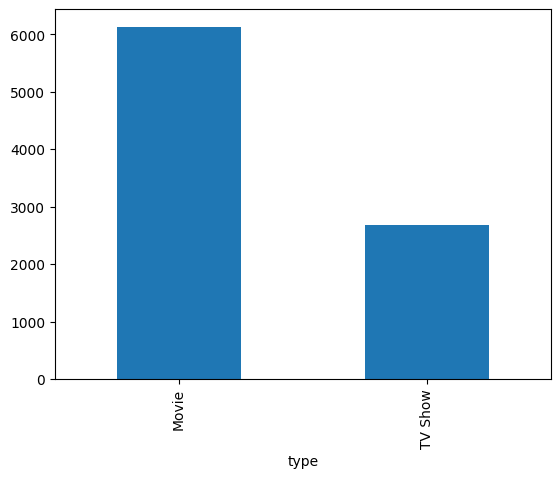

In [99]:
# Plot the count of each content type
df['type'].value_counts().plot(kind='bar')


#### Observation:
Movies are the dominant content type on the platform.

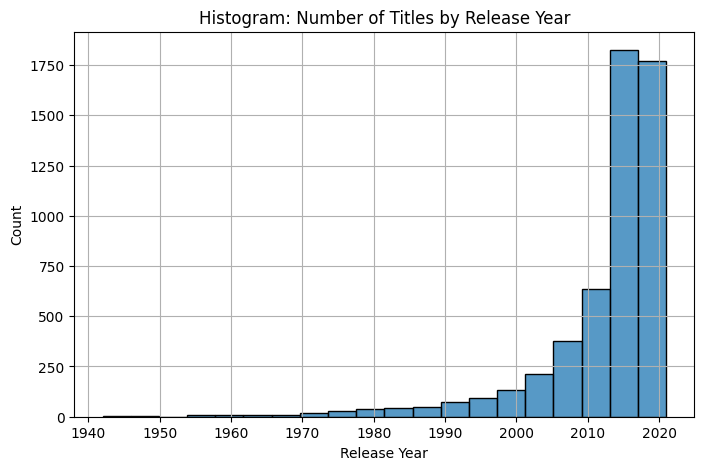

In [100]:
# Histogram of release year
plt.figure(figsize=(8,5))
sns.histplot(new_df['release_year'], bins=20, kde=False)
plt.title('Histogram: Number of Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#### Observations:
1.The number of titles released has increased significantly over time, especially after 2000.
2.The number of titles grew quickly between 2010 and 2020, showing a rise in content production.
3.People now prefer watching newer content more than older ones.

Text(0.5, 1.0, 'Distribution of Content Ratings')

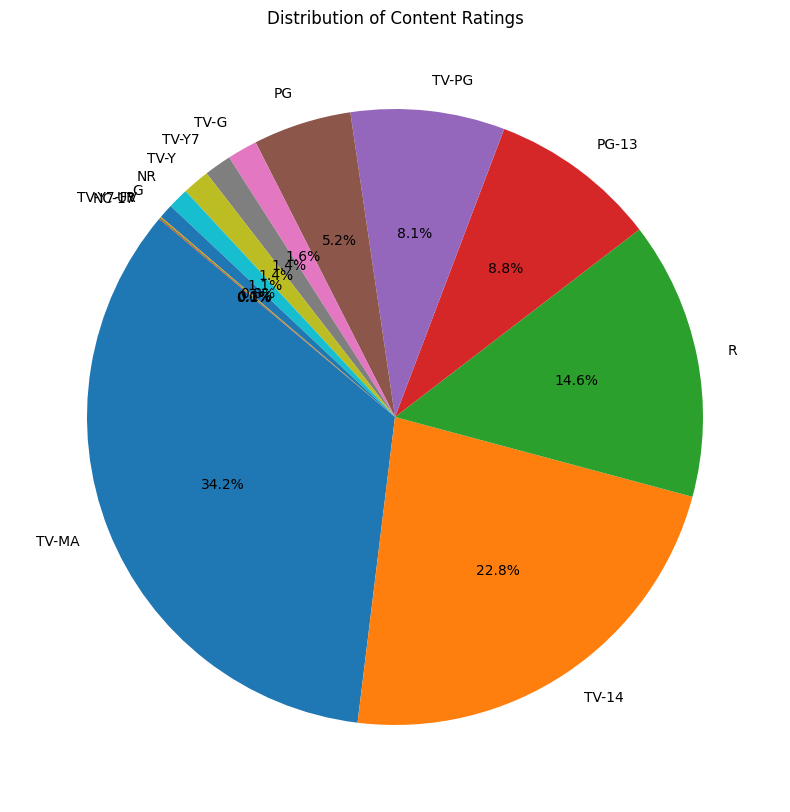

In [101]:
# Count of each rating
rating_counts = new_df['rating'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Ratings')

In [102]:
new_df['duration'].unique()

array(['125 min', '9 Seasons', '104 min', '127 min', '166 min', '103 min',
       '97 min', '106 min', '96 min', '124 min', '116 min', '98 min',
       '91 min', '115 min', '122 min', '99 min', '88 min', '100 min',
       '102 min', '93 min', '95 min', '85 min', '83 min', '182 min',
       '147 min', '90 min', '128 min', '143 min', '119 min', '114 min',
       '118 min', '108 min', '117 min', '121 min', '142 min', '113 min',
       '154 min', '120 min', '82 min', '94 min', '109 min', '101 min',
       '105 min', '86 min', '229 min', '76 min', '89 min', '110 min',
       '156 min', '112 min', '129 min', '107 min', '1 Season', '135 min',
       '136 min', '165 min', '150 min', '133 min', '145 min', '92 min',
       '2 Seasons', '64 min', '59 min', '111 min', '87 min', '148 min',
       '189 min', '141 min', '130 min', '7 Seasons', '68 min', '131 min',
       '126 min', '155 min', '123 min', '84 min', '4 Seasons', '13 min',
       '77 min', '74 min', '49 min', '72 min', '78 min', '70 min'

In [103]:
def convert_duration(value):
    if 'min' in value:
        return int(value.split()[0])
    elif 'Season' in value:
        return int(value.split()[0]) * 450  # 1 season ≈ 450 min
    else:
        return None

new_df['duration_min'] = new_df['duration'].dropna().apply(convert_duration)



### Bivariate Analysis


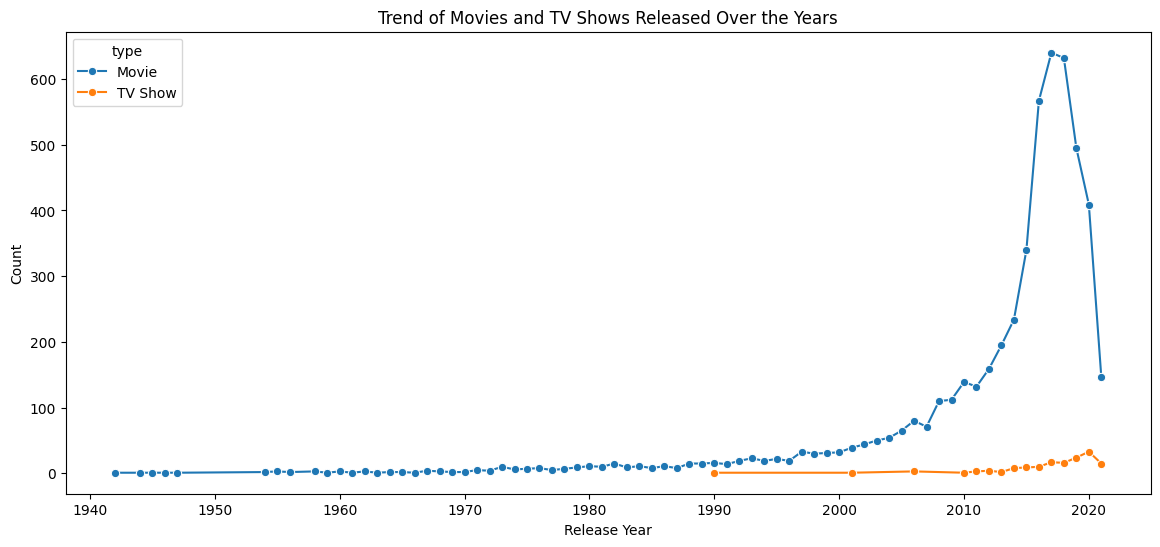

In [104]:
# Count the number of Movies and TV Shows per year
type_year_df = new_df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Sort values by year
type_year_df = type_year_df.sort_values(by='release_year')

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=type_year_df, x='release_year', y='count', hue='type', marker='o')
plt.title('Trend of Movies and TV Shows Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

#### Observations:
1. These outliers indicate the presence of very long-running TV shows, which are significantly longer than most content on the platform.

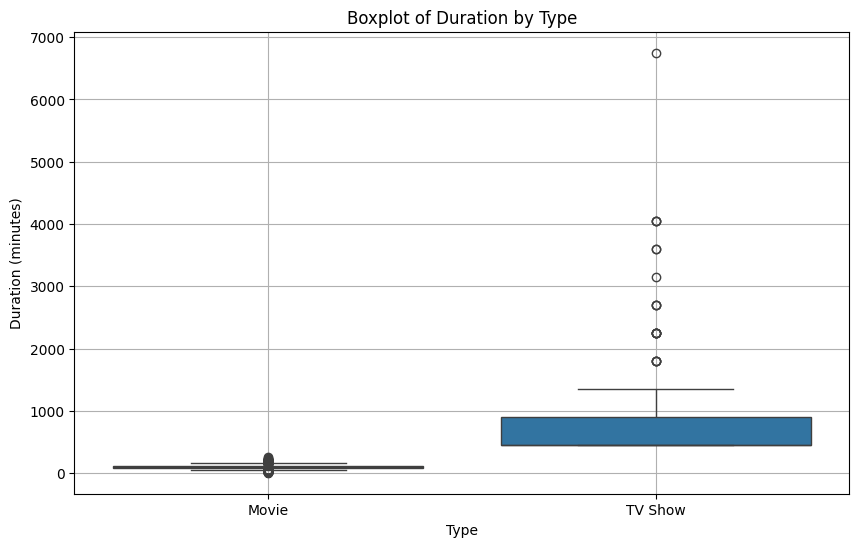

In [105]:
# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=new_df, x='type', y='duration_min')
plt.title('Boxplot of Duration by Type')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

#### Observations:
1. Movies generally have shorter durations than TV Shows.
2. The interquartile range (IQR) is narrow, suggesting less variability in movie durations.
3. The presence of many outliers for TV shows suggests that a few have very large total durations.

In [106]:
# correlation matrix
corr_matrix = new_df[['release_year', 'duration_min']].corr()
print(corr_matrix)

              release_year  duration_min
release_year      1.000000      0.023775
duration_min      0.023775      1.000000


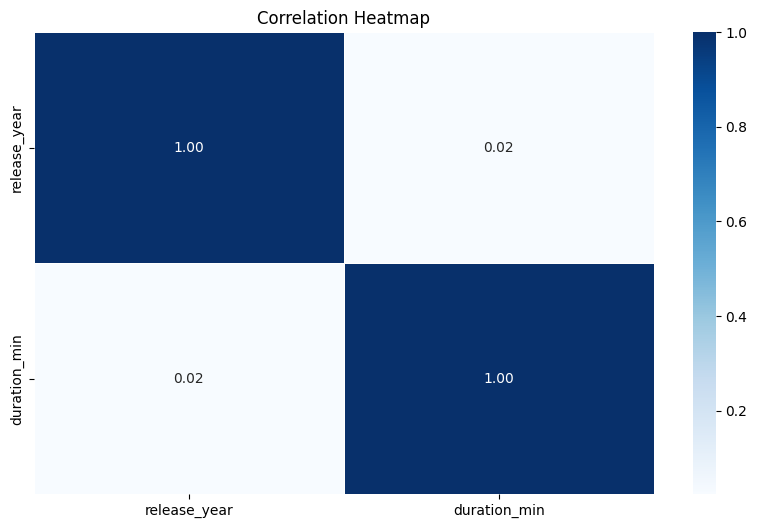

In [107]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Observation:
The correlation coefficient between release_year and duration_min is very close to 0 which indicates that there is no significant linear relationship between the release year of a show and its duration in minutes.